In [1]:
# Importing libraries

import pandas as pd 
import numpy as np
import statsmodels.api as sms
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importing data

df = pd.read_csv('./Data/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df.set_index('Month', inplace=True)

In [11]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

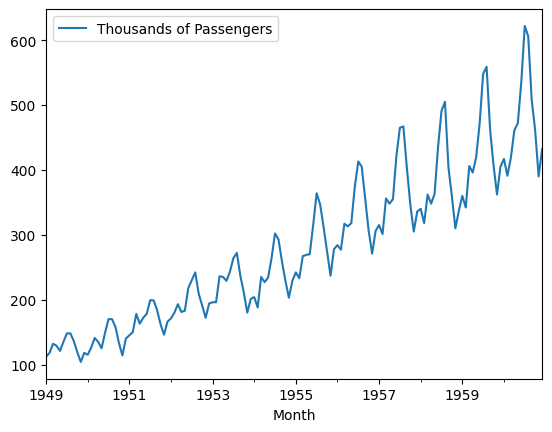

In [12]:
df.plot()

# Preforming Augmented Dicky fuller test

- To check if data is statinalry or not

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis, indecating series is stationary.')
    else:
        print('Weak evidence against the null hypothsis, indicating series is not stationary.')

In [16]:
adf_test(df['Thousands of Passengers'])

ADF Statistics: 0.8153688792060441
p-value: 0.9918802434376409
Weak evidence against the null hypothsis, indicating series is not stationary.


- As the series is not stationary we will make it stationary.

### Using differencing technique 

In [17]:
df['Pessanger First Diff'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [18]:
df.head()

,Thousands of Passengers,Pessanger First Diff
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


- Doing the augmented test again to check stationarity

In [19]:
adf_test(df['Pessanger First Diff'].dropna())

ADF Statistics: -2.8292668241700034
p-value: 0.05421329028382497
Weak evidence against the null hypothsis, indicating series is not stationary.


- Agian after our first differencing the data is not stationary but our p-value is very close to 0.05
- So we will be able to make our data starionary after second differencing, so lets do it.

In [20]:
df['Pessanger Second Diff'] = df['Pessanger First Diff'] - df['Pessanger First Diff'].shift(1)
df.head()

,Thousands of Passengers,Pessanger First Diff,Pessanger Second Diff
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


- Doing the adf test again to check the stationarity of our data.

In [22]:
adf_test(df['Pessanger Second Diff'].dropna())

ADF Statistics: -16.38423154246852
p-value: 2.732891850014085e-29
Strong evidence against null hypothesis, indecating series is stationary.


- So as we can see our p-value is almost close to 0 so our null got rejectes and our data is now stationary.
- So now our d or intigrated values is now 2 as we have done 2 times differencing to make our data stationary.

In [23]:
df['Pessanger 12 Diff'] = df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)
df.head()

,Thousands of Passengers,Pessanger First Diff,Pessanger Second Diff,Pessanger 12 Diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


- Lets do differencing for 12 month data as our data is seasonal.

In [24]:
adf_test(df['Pessanger 12 Diff'].dropna())

ADF Statistics: -3.3830207264924796
p-value: 0.011551493085515008
Strong evidence against null hypothesis, indecating series is stationary.


# Now lets find the values of p and q
- with the help of acf plot we will be able to find p value.
- with the help of pacf plot we will be able to find q value.

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

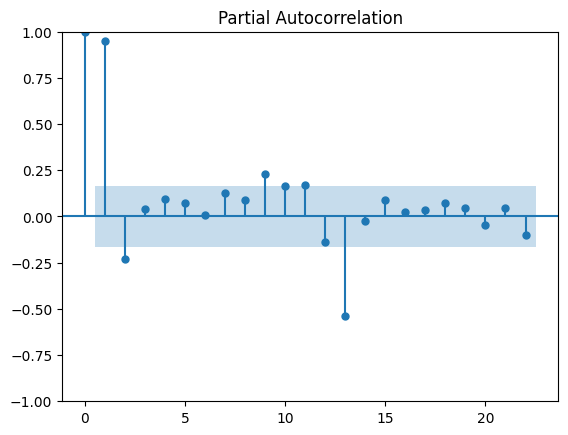

In [33]:
pacf = plot_pacf(df['Thousands of Passengers'].dropna())

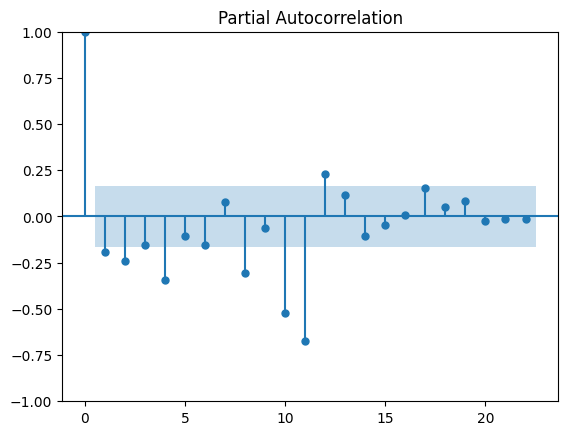

In [34]:
pacf2 = plot_pacf(df['Pessanger Second Diff'].dropna())

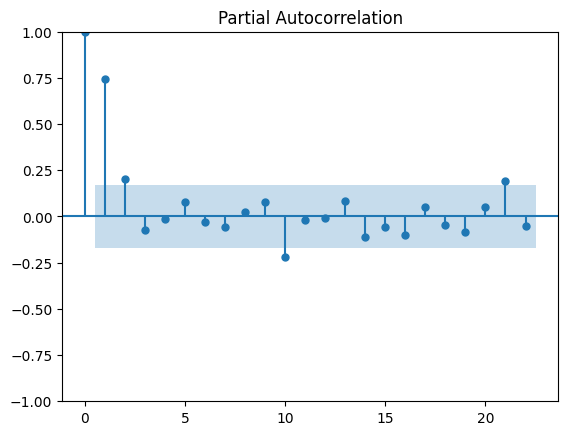

In [31]:
pacf12 = plot_pacf(df['Pessanger 12 Diff'].dropna())

- So as we can see in all our pacf graphs our points are out of upper or lower limit till 2 or 3 point.
- So we will try which p value works well with our model.

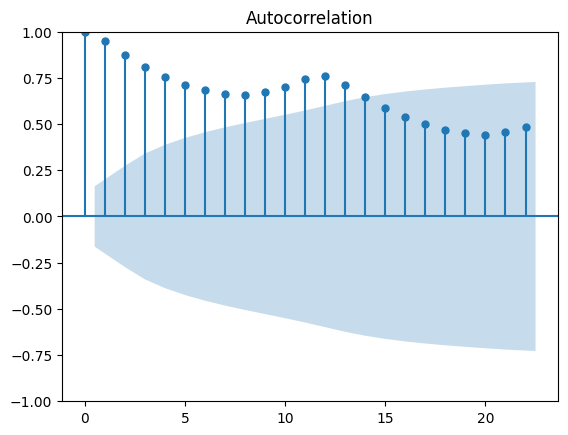

In [32]:
acf = plot_acf(df['Thousands of Passengers'].dropna())

- This acf graphs represents the seasonality of the series, which is 12.

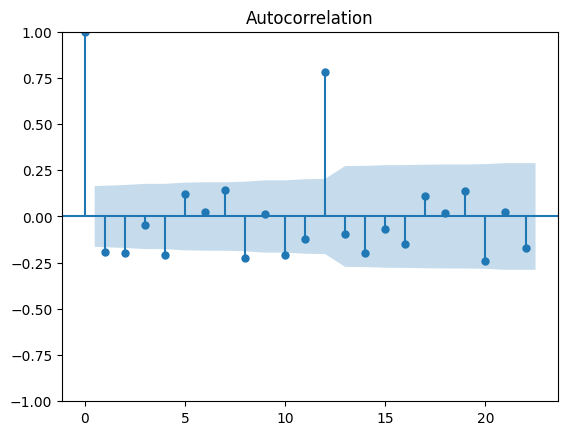

In [35]:
acf2 = plot_acf(df['Pessanger Second Diff'].dropna())

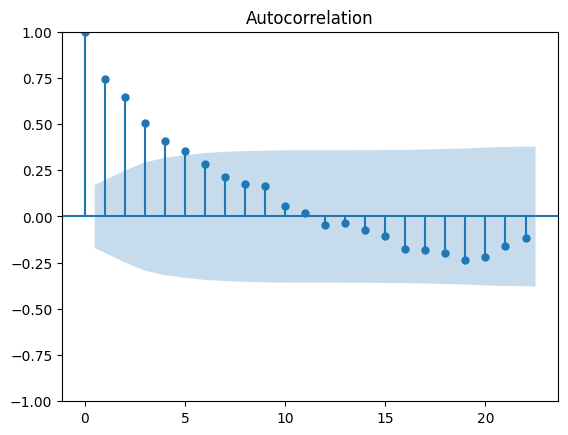

In [27]:
acf12 = plot_acf(df['Pessanger 12 Diff'].dropna())

- So as we can see in all the acf graphs that our points outside the upper limit or lower limit are till 4 to 5.
- So we will try which q value works the best for our model, and lets build the model with appropreate steps.

In [36]:
df

,Thousands of Passengers,Pessanger First Diff,Pessanger Second Diff,Pessanger 12 Diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [37]:
from datetime import datetime, timedelta

train_dateset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [60]:
train_data = df[:train_dateset_end]
test_data = df[datetime(train_dateset_end.year+1,1,1):test_dataset_end]

In [92]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [69]:
train_data

,Thousands of Passengers,Pessanger First Diff,Pessanger Second Diff,Pessanger 12 Diff
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [70]:
test_data

,Thousands of Passengers,Pessanger First Diff,Pessanger Second Diff,Pessanger 12 Diff
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [73]:
# Create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [89]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(2,2,5))

c:\Users\rushi\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\rushi\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\rushi\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [90]:
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\rushi\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [91]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(2, 2, 5)   Log Likelihood                -355.257
Date:                     Fri, 22 Sep 2023   AIC                            726.514
Time:                             13:30:55   BIC                            745.768
Sample:                         01-01-1949   HQIC                           734.244
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4061      0.145     -2.803      0.005      -0.690      -0.122
ar.L2         -0.2883      0.154     -1.877      0.061      -0.589       0.013
ma.L1         -0.5356      1.957     -0.274      0.784      -4.371       3.300
ma.L2         -0.4584      1.996     -0.230      0.818      -4.370       3.454
ma.L3         -0.4485      1.187     -0.378      0.706      -2.775       1.878
ma.L4         -0.5315      1.512     -0.352      0.725      -3.495       2.432
ma.L5          0.9912      2.372      0.418      0.676      -3.658       5.640
sigma2       272.4232    646.334      0.421      0.673    -994.368    1539.215
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.73
Prob(Q):                              0.75   Prob(JB):                         0.42
Heteroskedasticity (H):               3.73   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
pred = model_ARIMA_fit.predict(start=pred_start_date, end=pred_end_date)
error = df['Thousands of Passengers']-pred

In [94]:
pred

1956-01-01    291.835957
1956-02-01    291.321239
1956-03-01    304.283918
1956-04-01    293.692791
1956-05-01    298.560121
1956-06-01    303.939183
1956-07-01    304.654224
1956-08-01    307.115934
1956-09-01    310.212767
1956-10-01    312.548149
1956-11-01    315.009690
1956-12-01    317.639497
1957-01-01    320.164599
1957-02-01    322.683719
1957-03-01    325.235452
1957-04-01    327.775664
1957-05-01    330.311154
1957-06-01    332.851882
1957-07-01    335.391845
1957-08-01    337.930608
1957-09-01    340.470079
1957-10-01    343.009608
1957-11-01    345.548910
1957-12-01    348.088287
1958-01-01    350.627700
1958-02-01    353.167076
1958-03-01    355.706457
1958-04-01    358.245846
1958-05-01    360.785230
1958-06-01    363.324615
1958-07-01    365.864000
1958-08-01    368.403385
1958-09-01    370.942770
1958-10-01    373.482155
1958-11-01    376.021540
1958-12-01    378.560925
1959-01-01    381.100310
1959-02-01    383.639695
1959-03-01    386.179080
1959-04-01    388.718466


In [95]:
error

1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    176.651374
1960-09-01     76.111989
1960-10-01     26.572604
1960-11-01    -46.966782
1960-12-01     -7.506167
Length: 144, dtype: float64

<Axes: ylabel='Density'>

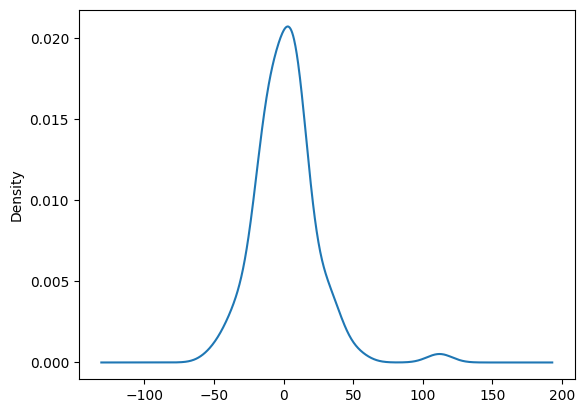

In [96]:
model_ARIMA_fit.resid.plot(kind='kde')

In [97]:
test_data['Prediction_ARIMA'] = pred

C:\Users\rushi\AppData\Local\Temp\ipykernel_11944\3524255855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction_ARIMA'] = pred


In [98]:
test_data

,Thousands of Passengers,Pessanger First Diff,Pessanger Second Diff,Pessanger 12 Diff,Prediction_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,291.835957
1956-02-01,277.0,-7.0,-13.0,44.0,291.321239
1956-03-01,317.0,40.0,47.0,50.0,304.283918
1956-04-01,313.0,-4.0,-44.0,44.0,293.692791
1956-05-01,318.0,5.0,9.0,48.0,298.560121
1956-06-01,374.0,56.0,51.0,59.0,303.939183
1956-07-01,413.0,39.0,-17.0,49.0,304.654224
1956-08-01,405.0,-8.0,-47.0,58.0,307.115934
1956-09-01,355.0,-50.0,-42.0,43.0,310.212767


<Axes: xlabel='Month'>

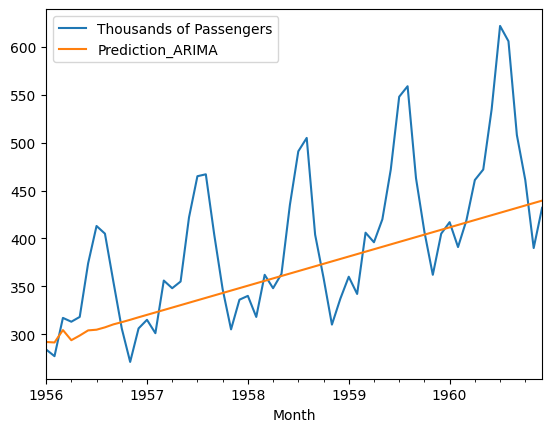

In [101]:
test_data[['Thousands of Passengers', 'Prediction_ARIMA']].plot()

In [105]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

print('MSE: {}'.format(mean_squared_error(test_data['Thousands of Passengers'], test_data['Prediction_ARIMA'])))
print('RMSE: {}'.format(mean_squared_error(test_data['Thousands of Passengers'], test_data['Prediction_ARIMA'], squared=False)))
print('MAPE: {}'.format(mean_absolute_percentage_error(test_data['Thousands of Passengers'], test_data['Prediction_ARIMA'])))
print('Accuracy {}'.format(1-mean_absolute_percentage_error(test_data['Thousands of Passengers'], test_data['Prediction_ARIMA'])))

MSE: 4812.636593372742
RMSE: 69.37316911726566
MAPE: 0.11303708759874785
Accuracy 0.8869629124012521


In [118]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_SARIMA=SARIMAX(train_data['Thousands of Passengers'], seasonal_order=(2,2,5,12))

c:\Users\rushi\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\rushi\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [119]:
model_SARIMA_fit = model_SARIMA.fit()

c:\Users\rushi\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\rushi\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [120]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                             
========================================================================================================
Dep. Variable:                          Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(1, 0, 0)x(2, 2, [1, 2, 3, 4, 5], 12)   Log Likelihood                -231.062
Date:                                          Fri, 22 Sep 2023   AIC                            480.123
Time:                                                  14:00:47   BIC                            498.973
Sample:                                              01-01-1949   HQIC                           487.496
                                                   - 12-01-1955                                         
Covariance Type:                                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8564      0.095      8.988      0.000       0.670       1.043
ar.S.L12      -1.5739     32.449     -0.049      0.961     -65.172      62.024
ar.S.L24      -0.9750     75.003     -0.013      0.990    -147.977     146.028
ma.S.L12       0.7347   3.15e+04   2.33e-05      1.000   -6.18e+04    6.18e+04
ma.S.L24      -0.6553   1.15e+04   -5.7e-05      1.000   -2.25e+04    2.25e+04
ma.S.L36      -0.4255   1.59e+04  -2.67e-05      1.000   -3.12e+04    3.12e+04
ma.S.L48       0.8265   2.72e+04   3.04e-05      1.000   -5.33e+04    5.33e+04
ma.S.L60       0.8575     21.275      0.040      0.968     -40.841      42.556
sigma2        42.1459     96.269      0.438      0.662    -146.537     230.829
===================================================================================
Ljung-Box (L1) (Q):                   3.60   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.06   Prob(JB):                         0.59
Heteroskedasticity (H):               1.14   Skew:                             0.09
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.25e+20. Standard errors may be unstable.
"""

In [121]:
pred_sarima = model_SARIMA_fit.predict(start=pred_start_date, end=pred_end_date)
test_data['Prediction_SARIMA'] = pred_sarima

C:\Users\rushi\AppData\Local\Temp\ipykernel_11944\2070048514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction_SARIMA'] = pred_sarima


In [122]:
error_sarima = test_data['Thousands of Passengers'] - test_data['Prediction_SARIMA']
error_sarima

Month
1956-01-01    -7.745211
1956-02-01     7.006569
1956-03-01    -3.065123
1956-04-01   -11.195307
1956-05-01   -11.572245
1956-06-01    16.713039
1956-07-01     2.590492
1956-08-01    17.354481
1956-09-01     7.253641
1956-10-01    -1.874778
1956-11-01     5.377824
1956-12-01     4.790576
1957-01-01     1.814153
1957-02-01    15.416852
1957-03-01    25.980191
1957-04-01    10.928469
1957-05-01    16.888577
1957-06-01    28.643053
1957-07-01    10.148663
1957-08-01    40.359845
1957-09-01    24.184900
1957-10-01    10.471616
1957-11-01    13.063299
1957-12-01    -0.114070
1958-01-01   -13.593927
1958-02-01    -1.116582
1958-03-01   -15.687666
1958-04-01   -49.354926
1958-05-01   -32.341613
1958-06-01    -2.818683
1958-07-01   -24.781830
1958-08-01    31.768451
1958-09-01   -25.449646
1958-10-01   -17.741544
1958-11-01   -10.118227
1958-12-01   -33.499682
1959-01-01   -29.405864
1959-02-01     1.108409
1959-03-01     5.476037
1959-04-01   -25.282897
1959-05-01    -4.213196
1959-06-01

<Axes: xlabel='Month'>

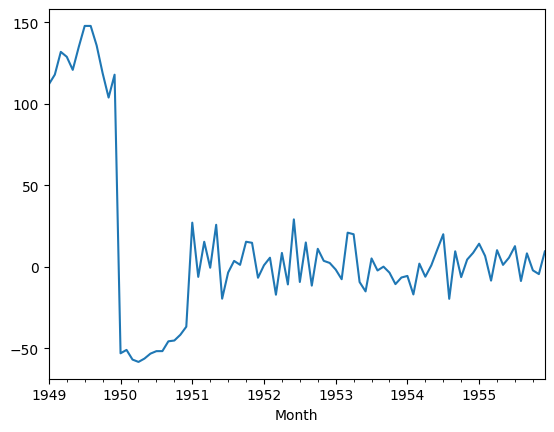

In [123]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

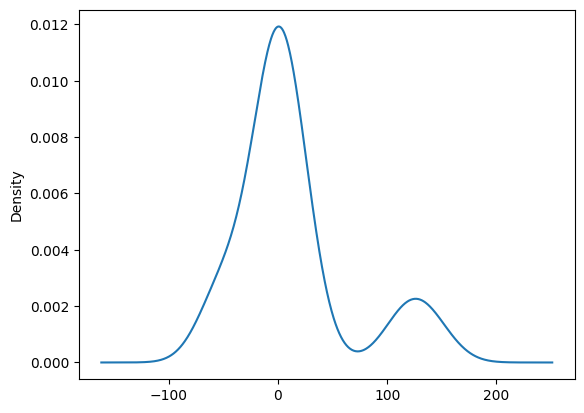

In [124]:
model_SARIMA_fit.resid.plot(kind='kde')

In [125]:
test_data.columns

Index(['Thousands of Passengers', 'Pessanger First Diff',
       'Pessanger Second Diff', 'Pessanger 12 Diff', 'Prediction_ARIMA',
       'Prediction_SARIMA'],
      dtype='object')

<Axes: xlabel='Month'>

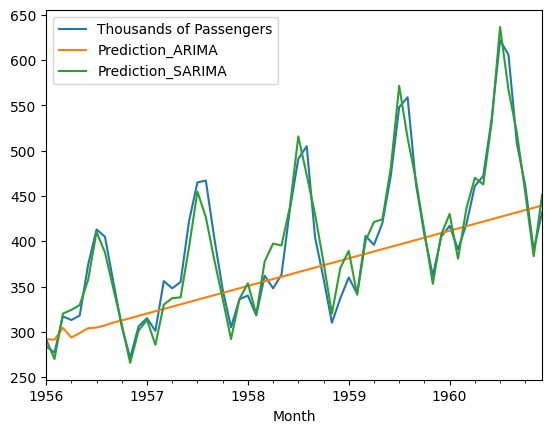

In [126]:
test_data[['Thousands of Passengers', 'Prediction_ARIMA', 'Prediction_SARIMA']].plot()

In [127]:
print('MSE: {}'.format(mean_squared_error(test_data['Thousands of Passengers'], test_data['Prediction_SARIMA'])))
print('RMSE: {}'.format(mean_squared_error(test_data['Thousands of Passengers'], test_data['Prediction_SARIMA'], squared=False)))
print('MAPE: {}'.format(mean_absolute_percentage_error(test_data['Thousands of Passengers'], test_data['Prediction_SARIMA'])))
print('Accuracy {}'.format(1-mean_absolute_percentage_error(test_data['Thousands of Passengers'], test_data['Prediction_SARIMA'])))

MSE: 348.8939927695814
RMSE: 18.67870425831464
MAPE: 0.036440174334433556
Accuracy 0.9635598256655664


- SARIMAX model is performing a lot better hen the ARIMA model:
    - Where Accuracy is more than 95%.
    - MSE And RMSE are also very less compared to ARIMA model.    